In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create random initial spins in an NxN array?
#Need to take into account the position of the spins

#Pick one random spin and flip it
#Calculate energy difference between the old and the new state
#If E_new > E_old: keep new state
#If E_new < E_old: calculate q = p(x')/p(x).
#Draw random number: if random number lower than q: accept new state

In [3]:
def initial_spins(N):
    lattice = np.random.choice([1, -1], size=(N,N))
    
    return lattice

def system_energy(lattice, coupling_constant):
    L = len(lattice[0,:])
    ham = 0
    for i in range(L):
        for j in range(L):
            h = 0
            h = lattice[i,j]*lattice[(i-1)%L,j-1] + lattice[i,j]*lattice[(i-1)%L,(j+1)%L] + lattice[i,j]*lattice[(i+1)%L,(j+1)%L] + lattice[i,j]*lattice[(i+1)%L,(j-1)%L]
            ham += h
    total_energy = -coupling_constant*ham
    return total_energy




def flip_spin(input_lattice):
    lattice = np.copy(input_lattice)
    dim = len(lattice[0,:])
    random_x = np.random.randint(0,dim)
    random_y = np.random.randint(0,dim)
    flip = lattice[random_x, random_y]
    flip *= -1
    lattice[random_x, random_y] = flip
    
    return lattice, random_x, random_y

def energy_difference(old_lattice, new_lattice):
    delta_energy = total_hamiltonian(new_lattice) - total_hamiltonian(old_lattice)
    return delta_energy


def monte_carlo(lattice, coupling_constant, temperature):
    beta = 1/temperature
    size = len(lattice[0,:])
    random_x, random_y = np.random.randint(size, size=2)
    delta_E = 2 * coupling_constant * lattice[random_x, random_y] * (lattice[(random_x-1)%size, random_y] 
                                                              + lattice[(random_x+1)%size, random_y] 
                                                              + lattice[random_x, (random_y-1)%size] 
                                                              + lattice[random_x, (random_y+1)%size])
    if delta_E <= 0:
        lattice[random_x, random_y] *= -1
        return lattice, delta_E
    if np.random.rand() < np.exp(-delta_E * beta):
        lattice[random_x, random_y] *= -1
        return lattice, delta_E
    else:
        return lattice, 0

def show_snapshot(lattice, timestep):
    
    plt.imshow(lattice, cmap='binary')
    plt.title(f'Timestep {timestep}')
    plt.show()


def ising_simulation(size, coupling_constant, temperature, timesteps):
    lattice = initial_spins(size)
    energies = []
    magnetizations = []
    for i in range(timesteps):
        lattice, delta_E = monte_carlo(lattice, coupling_constant, temperature)
        energies.append(system_energy(lattice, coupling_constant))
        magnetizations.append(np.sum(lattice))
        if i%1000 == 0:
            show_snapshot(lattice, i)
                
    return np.array(energies), np.array(magnetizations)

In [4]:
#Define constants
n_spins = 50
coupling_constant = 1
temperature = 1
n_steps = 10000




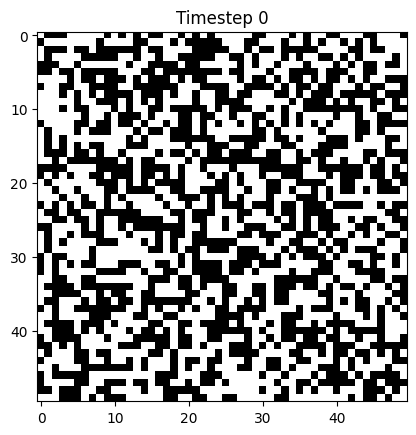

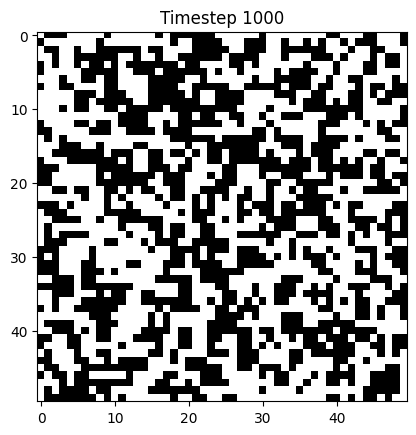

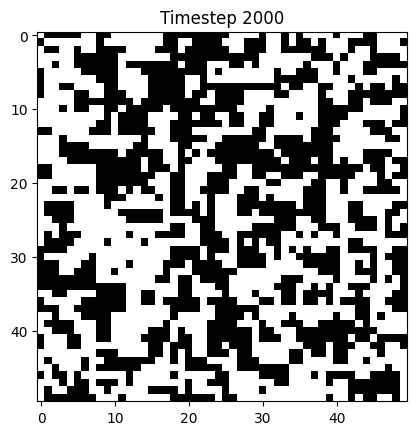

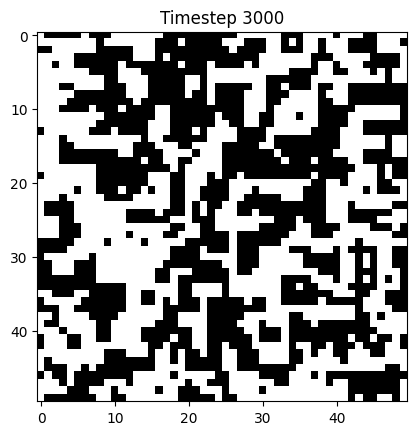

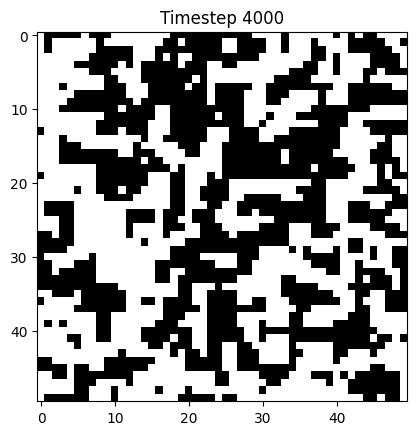

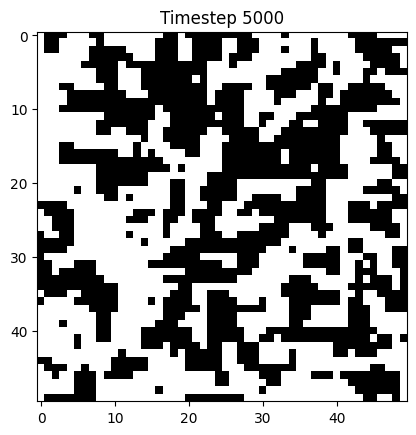

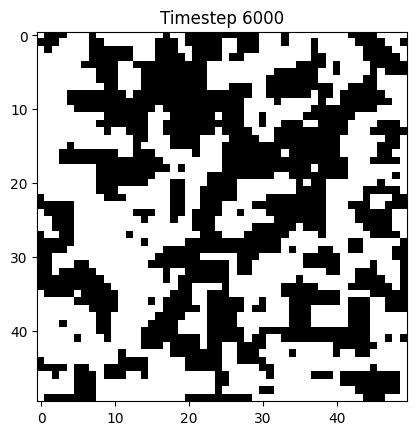

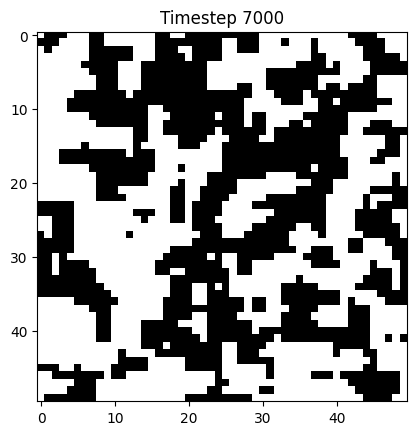

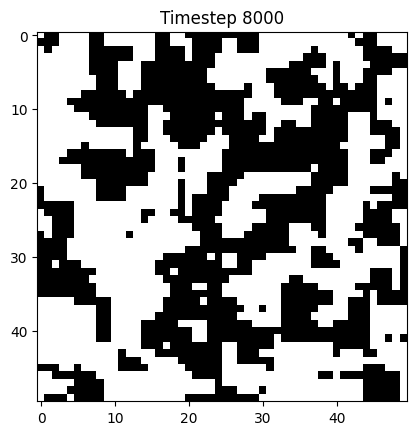

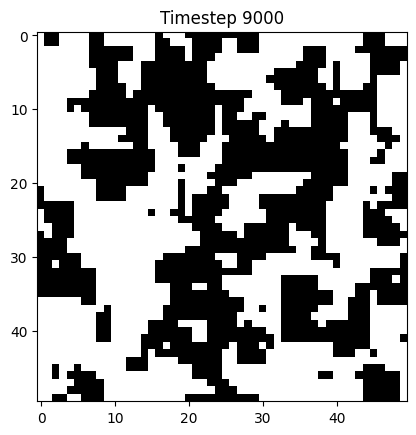

In [5]:
# Run the simulation
energies, magnetizations = ising_simulation(n_spins, coupling_constant, temperature, n_steps)

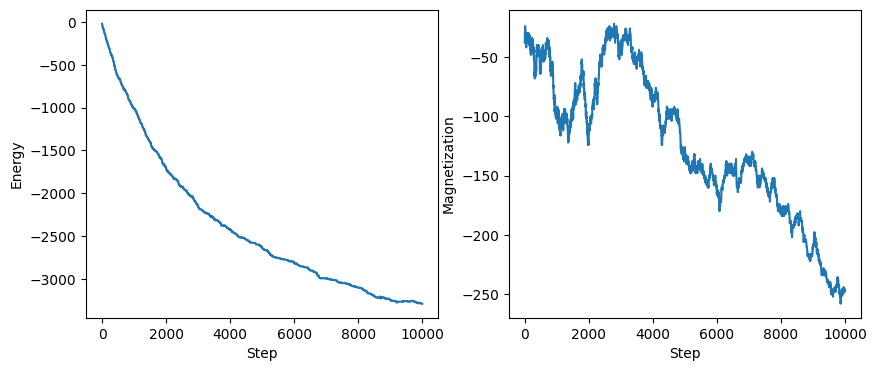

In [6]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(energies)
ax1.set_xlabel("Step")
ax1.set_ylabel("Energy")
ax2.plot(magnetizations)
ax2.set_xlabel("Step")
ax2.set_ylabel("Magnetization")
plt.show()